# Examining factors responsible for Heart attacks

In [1]:
#import the excel file
import pandas as pd
health=pd.read_excel("healthcare.xlsx")

In [2]:
health.head(2)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1


In [3]:
#finding missing values
health.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

There are no missing values in this data

In [4]:
#finding duplicates in the data
duplicate=health[health.duplicated()]

In [5]:
duplicate

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
164,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1


In [6]:
#dropping duplicates
hc=health.drop_duplicates()

In [7]:
hc.duplicated().sum()

0

In [8]:
hc.rename(columns={'cp':'chest_pain_type',
                   'trestbps':'resting_bp',
                   'chol':'cholesteral',
                   'fbs':'fasting_bloodsugar',
                    'restecg':'ecg_results',
                    'thalach':'max_heartrate',
                    'ca':'no_majorvessels'},inplace=True)


C:\Users\Vijay\anaconda3\lib\site-packages\pandas\core\frame.py:4441: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


In [9]:
#info about each column
hc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 302 entries, 0 to 302
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   age                 302 non-null    int64  
 1   sex                 302 non-null    int64  
 2   chest_pain_type     302 non-null    int64  
 3   resting_bp          302 non-null    int64  
 4   cholesteral         302 non-null    int64  
 5   fasting_bloodsugar  302 non-null    int64  
 6   ecg_results         302 non-null    int64  
 7   max_heartrate       302 non-null    int64  
 8   exang               302 non-null    int64  
 9   oldpeak             302 non-null    float64
 10  slope               302 non-null    int64  
 11  no_majorvessels     302 non-null    int64  
 12  thal                302 non-null    int64  
 13  target              302 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 35.4 KB


In [10]:
#statistical summary of the data
hc.describe()

,age,sex,chest_pain_type,resting_bp,cholesteral,fasting_bloodsugar,ecg_results,max_heartrate,exang,oldpeak,slope,no_majorvessels,thal,target
count,302.00000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000
mean,54.42053,0.682119,0.963576,131.602649,246.500000,0.149007,0.526490,149.569536,0.327815,1.043046,1.397351,0.718543,2.314570,0.543046
std,9.04797,0.466426,1.032044,17.563394,51.753489,0.356686,0.526027,22.903527,0.470196,1.161452,0.616274,1.006748,0.613026,0.498970
min,29.00000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.00000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.250000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.50000,1.000000,1.000000,130.000000,240.500000,0.000000,1.000000,152.500000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.00000,1.000000,2.000000,140.000000,274.750000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.00000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [11]:
hc.target.dtype

dtype('int64')

In [12]:
#to find catgeorical variables in the data
hc.nunique()

age                    41
sex                     2
chest_pain_type         4
resting_bp             49
cholesteral           152
fasting_bloodsugar      2
ecg_results             3
max_heartrate          91
exang                   2
oldpeak                40
slope                   3
no_majorvessels         5
thal                    4
target                  2
dtype: int64

In [13]:
#total no of rows
hc.shape

(302, 14)

Here,where no of unique values are less than 90% of total no of rows are categorical variables.So columns Sex,chest_pain_type, fasting_bloodsugar, ecg_results,exang,slope, no_majorvessels, thal,target are categorical variables

C:\Users\Vijay\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='sex', ylabel='count'>

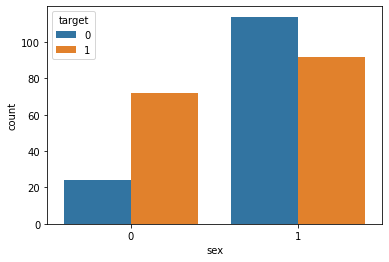

In [33]:
#exploring about categorical values
#occurence of CVD among gender male and female
import seaborn as sns
sns.countplot(hc["sex"],hue=hc["target"])

Here 1 is male and 0 is female. So more men are prone to CVD than women

C:\Users\Vijay\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='chest_pain_type', ylabel='count'>

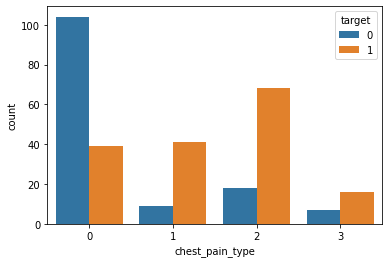

In [32]:
#occurence of CVD across different chest pain types
sns.countplot(hc["chest_pain_type"],hue=hc["target"])

Chest pain type 2 having more occurence of CVD

C:\Users\Vijay\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='fasting_bloodsugar', ylabel='count'>

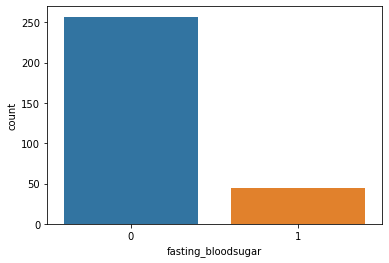

In [38]:
# occurence of CVD with respect to blood sugar level i.e.if fasting blood sugar level is greater than 120mg/dl ,then they are diabetes patients
sns.countplot(hc["fasting_bloodsugar"])

Here fasting blood sugar level>120 mg/dl, 1=True,0=false

C:\Users\Vijay\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='fasting_bloodsugar', ylabel='count'>

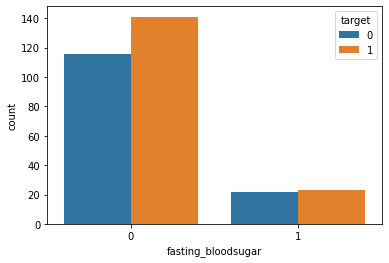

In [40]:
sns.countplot(hc["fasting_bloodsugar"],hue=hc["target"])

So from this data, both diabetes and non-diabetes patients are prone to CVD

C:\Users\Vijay\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='ecg_results', ylabel='count'>

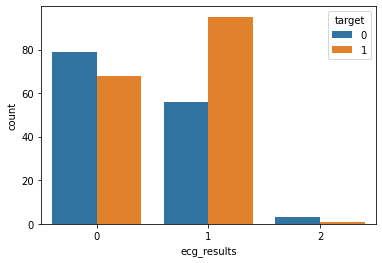

In [35]:
#ecg results with respect to target
sns.countplot(hc["ecg_results"],hue=hc["target"])

Here ,when ECG result is '1' then CVD will occur 

C:\Users\Vijay\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='exang', ylabel='count'>

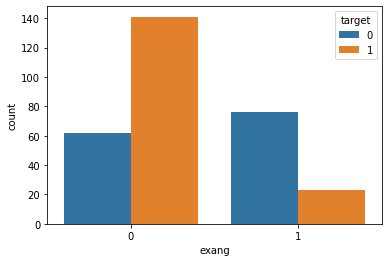

In [41]:
#Angina is caused by reduced blood flow to your heart muscle due to exercise or physical activity.The most common cause 
#of reduced blood flow to your heart muscle is coronary artery disease (CAD)
sns.countplot(hc["exang"],hue=hc["target"])

exercise induced angina 1=yes, 0=no. So exercise induced angina is less in this data since 'no' is more

C:\Users\Vijay\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='thal', ylabel='count'>

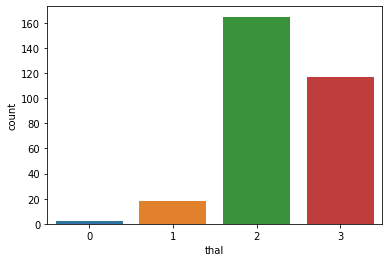

In [19]:
#Thalasemia is blood disorder. Here,value 0: null, 1:Fixed defect, 2: Normal blood flow, 3:Reversible defect
sns.countplot(hc["thal"])

So, 2:Normal blood flow type is more in the given dataset

C:\Users\Vijay\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='target', ylabel='count'>

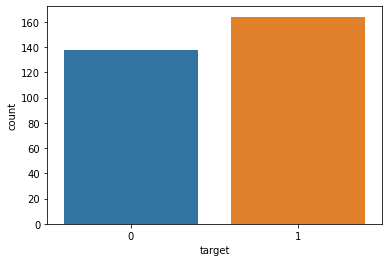

In [20]:
#count of CVD occurence
sns.countplot(hc["target"])


1=with CVD, 0= without CVD

C:\Users\Vijay\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='age', ylabel='count'>

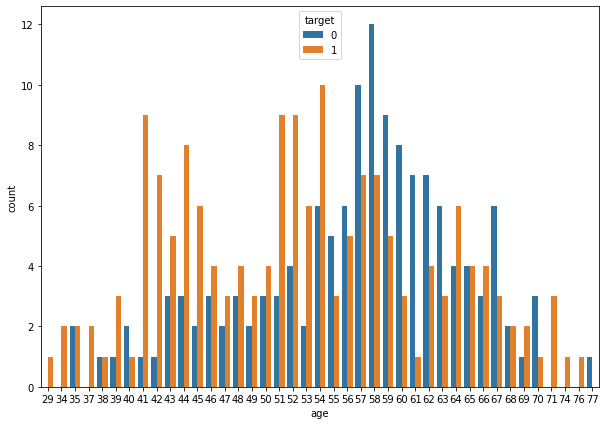

In [21]:
#Studying the occurrence of CVD across different ages.
import matplotlib.pyplot as plt
plt.subplots(figsize=(10,7))
sns.countplot(hc["age"],hue=hc["target"])

So occurence of CVD is more for the age group between 40-65

C:\Users\Vijay\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='target', ylabel='age'>

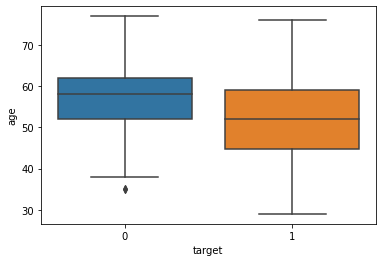

In [42]:
#visualizing age and occurence of cvd
sns.boxplot(hc["target"],hc["age"])

C:\Users\Vijay\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='target', ylabel='resting_bp'>

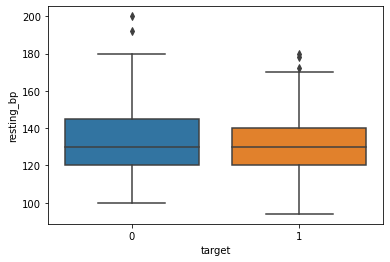

In [36]:
#visualizing bp with target variable
sns.boxplot(hc["target"],hc["resting_bp"])

In [ ]:
This shows there is no significant occurence of cvd among varying bp

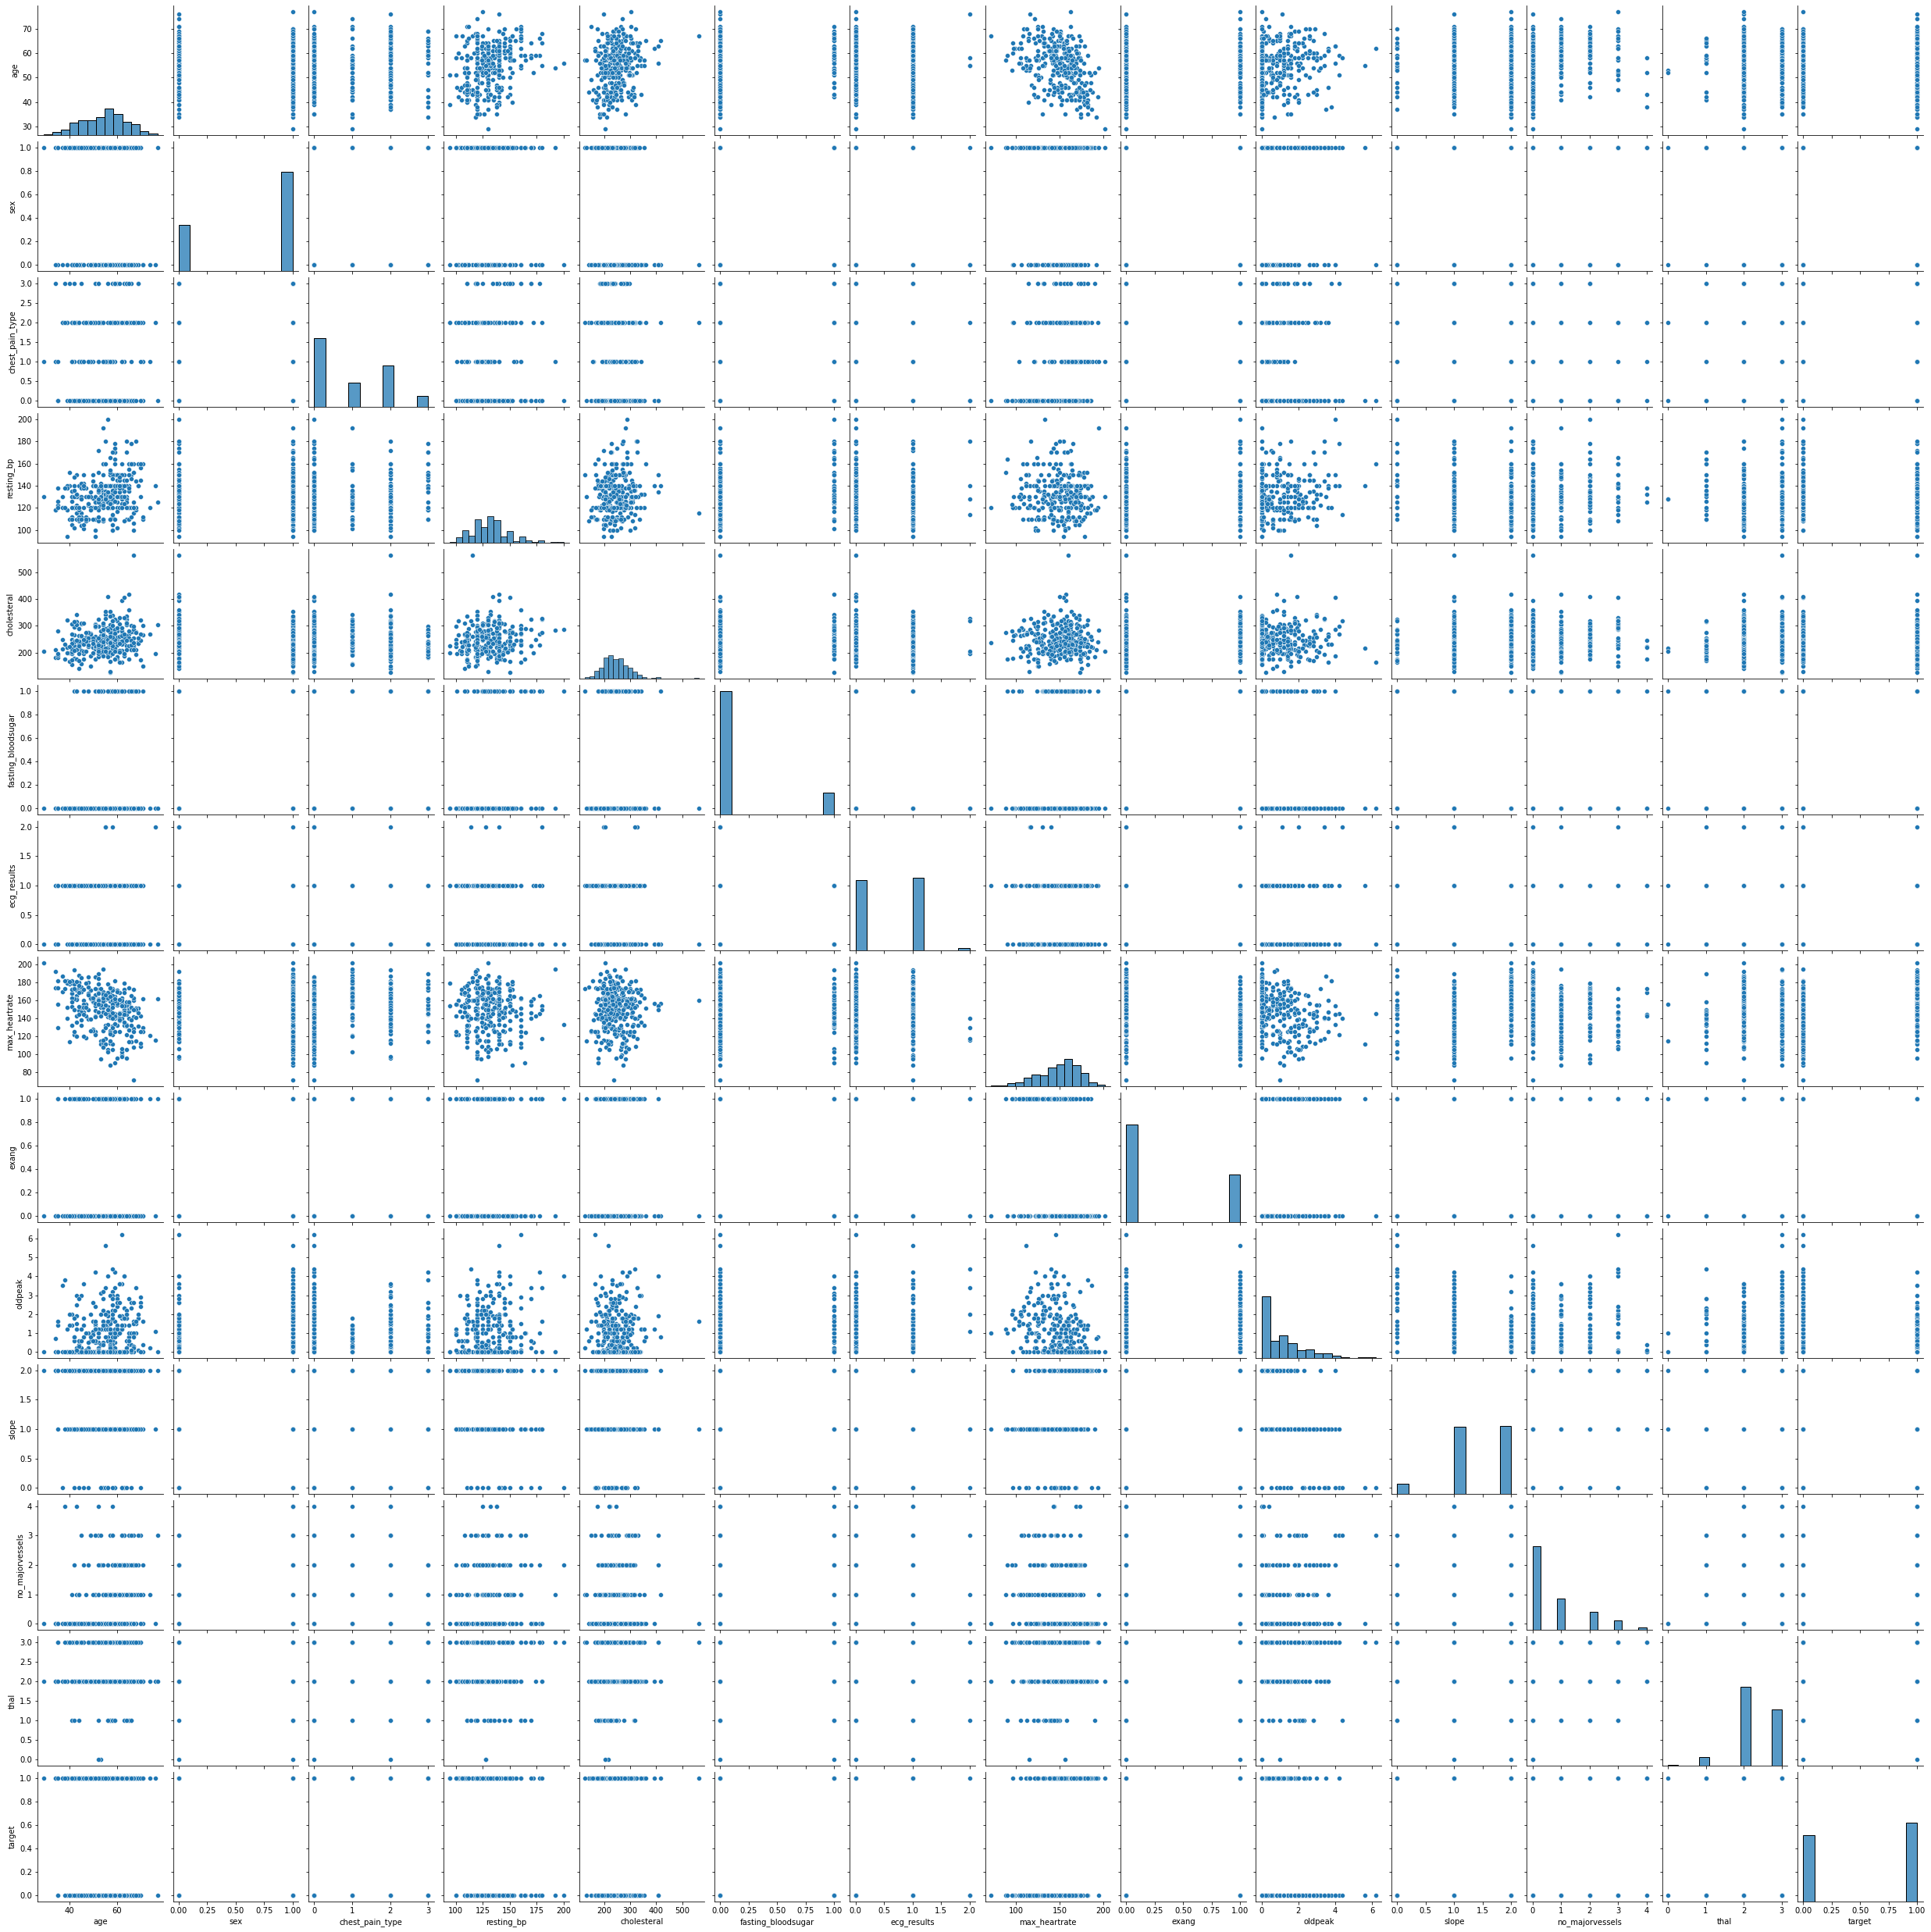

In [24]:
#understanding the relationship between all the given variables.
sns.pairplot(hc)

In [25]:
#finding correlation between all variables in the data
hs=hc.corr()

<AxesSubplot:>

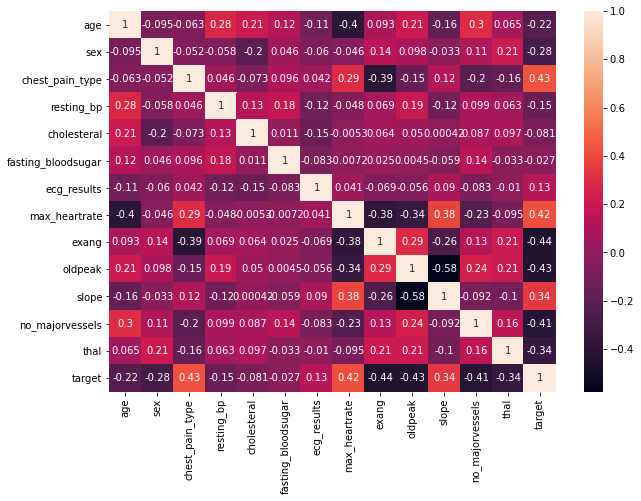

In [26]:
plt.subplots(figsize=(10,7))
sns.heatmap(hs,annot=True)

C:\Users\Vijay\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='target', ylabel='cholesteral'>

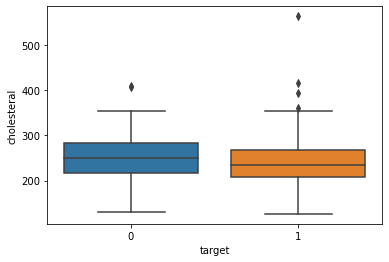

In [27]:
#studing whether cholesteral has any effect on cvd
sns.boxplot(hc["target"],hc["cholesteral"])

#some ppl having more cholesteral are affected by CVD. So cholesteral has some impact on CVD

C:\Users\Vijay\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='target', ylabel='oldpeak'>

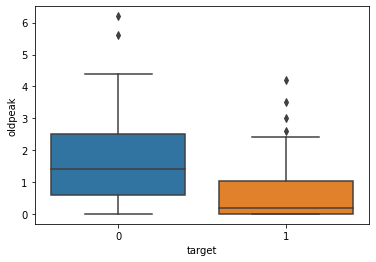

In [28]:
#studying how ST depression induced by exercise relative to rest behaves with CVD
sns.boxplot(hc["target"],hc["oldpeak"])

<AxesSubplot:xlabel='thal', ylabel='count'>

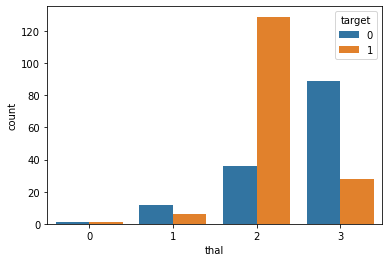

In [31]:
#Understanding whether thalassemia has any impact on CVD
sns.countplot(hc["thal"],hue=hc["target")

So, 2.Normal blood flow type is prone to CVD as per the given data

In [48]:
#performing logistic regression since target variable is categorical
X=hc.iloc[:,[0,1,2,3,4,5,6,7,8,9,10,11,12]]

In [49]:
y=hc.iloc[:,13]

In [50]:
X.head(2)

,age,sex,chest_pain_type,resting_bp,cholesteral,fasting_bloodsugar,ecg_results,max_heartrate,exang,oldpeak,slope,no_majorvessels,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2


In [51]:
y.head(2)

0    1
1    1
Name: target, dtype: int64

In [52]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=42)

In [53]:
from sklearn.linear_model import LogisticRegression
log=LogisticRegression()

In [54]:
log.fit(X_train,y_train)

C:\Users\Vijay\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [55]:
log.score(X_test,y_test)

0.8421052631578947

In [56]:
log.coef_

array([[ 0.01993809, -1.18429386,  0.73639851, -0.02325168, -0.00195619,
         0.18457977,  0.69114596,  0.02990701, -0.76455677, -0.43919895,
         0.74210257, -0.81089457, -0.92617895]])

In [57]:
log.intercept_

array([0.05574957])

In [59]:
y_preds=log.predict(X_test)

In [60]:
y_preds

array([0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 0, 1], dtype=int64)

In [62]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
confusion_matrix(y_test,y_preds)

array([[29,  6],
       [ 6, 35]], dtype=int64)

In [63]:
accuracy_score(y_test,y_preds)

0.8421052631578947

In [64]:
print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

           0       0.83      0.83      0.83        35
           1       0.85      0.85      0.85        41

    accuracy                           0.84        76
   macro avg       0.84      0.84      0.84        76
weighted avg       0.84      0.84      0.84        76



In [65]:
y_test

180    0
229    0
111    1
247    0
60     1
      ..
22     1
259    0
56     1
243    0
114    1
Name: target, Length: 76, dtype: int64